In [34]:
library("dplyr")
library("ggplot2")
library("gridExtra")
library("pdftools")
data <- read.csv("TraitofInterest.csv")

In [3]:
data <- data %>% mutate(Variable = case_when(originaltraitname %in% c("Development Rate", "Development Time", "Development time","Generation Time","Egg development time") ~ 'alp',
                                             originaltraitname %in% c("Fecundity","Fecundity Rate", "Oviposition Rate") ~ 'bpk',
                                             originaltraitname %in% c("Adult longevity (female, bloodfed)", "Adult longevity (male)","Adult survival","Adult survival (female, bloodfed)", "Adult survival (male)") ~ 'z',
                                            originaltraitname %in% c("Juvenile survival","Juvenile survival ") ~ 'z_J',
                                             originaltraitname %in% c("Longevity","Mortality Rate","Percentage Survival","Survival Rate","Survivorship", "Survival Time") ~ 'Mortality'))


In [4]:
fecund <- subset(data,data$Variable=="bpk")
fecund <- gdata::drop.levels(fecund)

levels(fecund$originaltraitunit)
levels(fecund$interactor1)

[1] "eggs"                             "eggs per female"                 
[3] "eggs per female per cycle"        "eggs per female per day"         
[5] "Eggs/female/day"                  "event / (1 individual * 24 hour)"
[7] "nymphs/female/day"                "per day per female"

[1] "Aedes aegypti"                "Aedes albopictus"            
[3] "Aedes camptorhynchus"         "Anthonomus grandis"          
[5] "Aphis gossypii"               "Corythucha ciliata"          
[7] "Culex annulirostris"          "Tetraneura nigri abdominalis"

In [5]:
##Aedes aegypti
aegypti <- subset(fecund, fecund$interactor1 =="Aedes aegypti")
aegypti <- gdata::drop.levels(aegypti)

levels(aegypti$originaltraitunit)

aegypti$stdvalue <- aegypti$originaltraitvalue
aegypti$stdunit <- "Eggs per female per day"
ncol(aegypti)

[1] "per day per female"

[1] 152

In [6]:
##Aedes albopictus
albop <- subset(fecund, fecund$interactor1 =="Aedes albopictus")
albop <- gdata::drop.levels(albop)

levels(albop$originaltraitunit)

#write.csv(albop,file="albop.csv")
#data inputted was incorrect, edited it manually
#From the original study, oviposition is measured by the number of eggs per gonotrophic cycle, I changed the original trait value into average number of eggs per female (paper lists eggs + number of individuals) and put the mean time per cycle as a secondary stressor

albop2 <-read.csv("albop.csv")
albop2$stdvalue <- albop2$originaltraitvalue/albop2$secondstressorvalue
albop2$stdunit <- "Eggs per female per day"


[1] "eggs per female per cycle"

In [7]:
##Corythucha ciliata
Cory <- subset(fecund, fecund$interactor1 =="Corythucha ciliata")
Cory <- gdata::drop.levels(Cory)

levels(Cory$originaltraitunit)

#write.csv(Cory,file="Cory.csv")
#Updated dataset manually to include length of ovoposition period as secondary stressor

Cory2 <- read.csv("Cory.csv")
Cory2$stdvalue <- Cory2$originaltraitvalue/Cory2$secondstressorvalue
Cory2$stdunit <- "Eggs per female per day"


[1] "eggs per female"

In [8]:
##Tetraneura nigri abdominalis
Tetra <- subset(fecund, fecund$interactor1 =="Tetraneura nigri abdominalis")
Tetra <- gdata::drop.levels(Tetra)

levels(Tetra$originaltraitunit)

Tetra$stdvalue <- Tetra$originaltraitvalue
Tetra$stdunit <- "Offspring per female per day"

[1] "event / (1 individual * 24 hour)"

In [9]:
#combining dataframes  
str(aegypti)
str(albop2)
str(Cory2)
str(Tetra)

aegypti <- aegypti[, ! names(aegypti) %in% "X"]
albop2 <- albop2[, ! names(albop2) %in% c("X","X.2","X.1")]
Cory2 <- Cory2[, ! names(Cory2) %in% c("X","X.1")]
Tetra <- Tetra[, ! names(Tetra) %in% "X"]

stdfecund <- rbind(aegypti,albop2,Cory2,Tetra)

'data.frame':	12 obs. of  152 variables:
 $ X                          : int  1702 2434 3100 4100 5100 6100 7100 8100 9 10 ...
 $ originalid                 : Factor w/ 1 level "csm1A": 1 1 1 1 1 1 1 1 1 1 ...
 $ originaltraitname          : Factor w/ 1 level "Oviposition Rate": 1 1 1 1 1 1 1 1 1 1 ...
 $ originaltraitdef           : Factor w/ 1 level "": 1 1 1 1 1 1 1 1 1 1 ...
 $ standardisedtraitname      : Factor w/ 0 levels: NA NA NA NA NA NA NA NA NA NA ...
 $ standardisedtraitdef       : Factor w/ 0 levels: NA NA NA NA NA NA NA NA NA NA ...
 $ originaltraitvalue         : num  0 0 0.355 1.121 3.367 ...
 $ originaltraitunit          : Factor w/ 1 level "per day per female": 1 1 1 1 1 1 1 1 1 1 ...
 $ originalerrorpos           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ originalerrorneg           : num  NA NA NA NA NA NA NA NA NA NA ...
 $ originalerrorunit          : Factor w/ 1 level "": 1 1 1 1 1 1 1 1 1 1 ...
 $ standardisedtraitvalue     : num  NA NA NA NA NA NA NA NA NA NA 

'data.frame':	6 obs. of  153 variables:
 $ X.1                        : int  1455 1456 1457 1458 1459 1460
 $ X                          : int  668 669 670 671 672 673
 $ originalid                 : Factor w/ 1 level "csm4X": 1 1 1 1 1 1
 $ originaltraitname          : Factor w/ 1 level "Fecundity": 1 1 1 1 1 1
 $ originaltraitdef           : logi  NA NA NA NA NA NA
 $ standardisedtraitname      : logi  NA NA NA NA NA NA
 $ standardisedtraitdef       : logi  NA NA NA NA NA NA
 $ originaltraitvalue         : num  0 87.7 146.1 273 286.8 ...
 $ originaltraitunit          : Factor w/ 1 level "eggs per female": 1 1 1 1 1 1
 $ originalerrorpos           : num  0 17.8 32.6 36.2 45.6 57.6
 $ originalerrorneg           : num  0 17.8 32.6 36.2 45.6 57.6
 $ originalerrorunit          : Factor w/ 1 level "eggs per female": 1 1 1 1 1 1
 $ standardisedtraitvalue     : logi  NA NA NA NA NA NA
 $ standardisedtraitunit      : logi  NA NA NA NA NA NA
 $ standardisederrorpos       : logi  NA NA NA NA NA

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Saving 7 x 7 in image

Warning message:
“Removed 1 rows containing missing values (geom_point).”


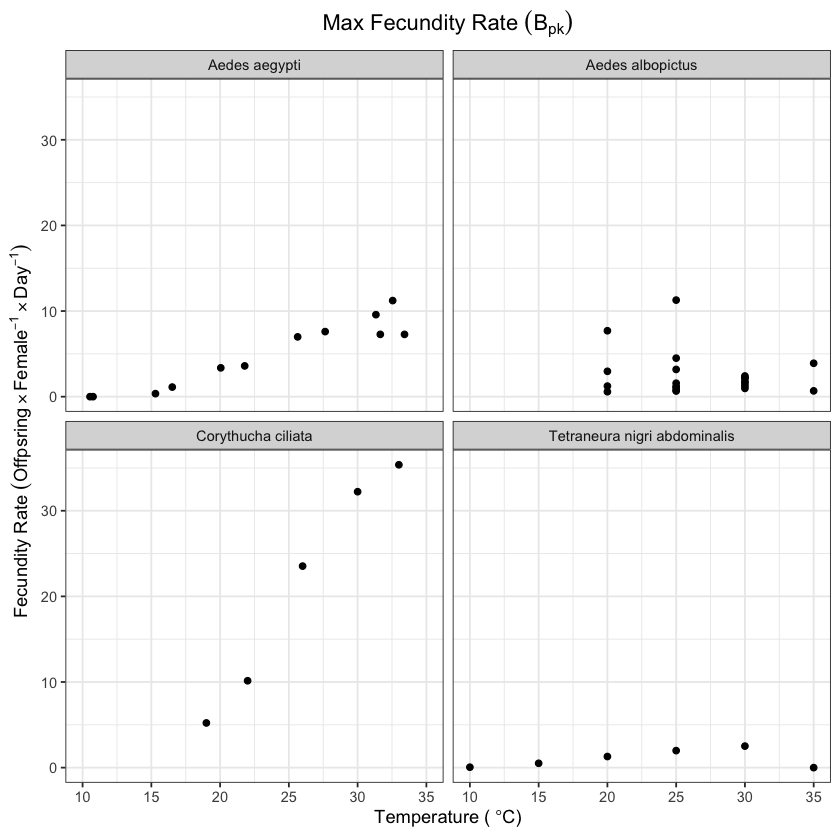

In [30]:
fecundTPC <- ggplot(stdfecund, aes(x=ambienttemp, y=stdvalue)) + geom_point() + labs(title=expression(paste("Max Fecundity Rate ", (B[pk]))), x=expression(paste('Temperature (',~degree,'C)',sep='')), y=expression(paste("Fecundity Rate ", (Offpsring %*% Female^-1 %*% Day^-1)))) + facet_wrap(~ interactor1) + theme_bw() + theme(plot.title = element_text(hjust = 0.5))

fecundTPC
ggsave("fecTPC1.pdf", plot=fecundTPC)

## With time series data 

In [38]:
Time <- subset(fecund,fecund$interactor1 %in% c("Culex annulirostris","Anthonomus grandis","Aphis gossypii"))
Time <- gdata::drop.levels(Time)
Time$temp <- as.character(Time$ambienttemp)


Plot <- ggplot(Time, aes(x=secondstressorvalue, y=originaltraitvalue, colour=temp)) + geom_point() + theme_bw()+ labs(colour=expression(paste("Temperature( ", ~degree, "C)")), x= "Time (Days)", y=expression(paste("Fecundity Rate ", (Offpsring %*% Female^-1 %*% Day^-1))), title="Fecundity Rate") + theme(plot.title = element_text(hjust = 0.5))
TPC2<- Plot + facet_wrap(~ interactor1, nrow=2, scales="free")
ggsave("fecTPC2.pdf", plot=TPC2)

Saving 7 x 7 in image



In [39]:
pdf_combine(c("fecTPC1.pdf", "fecTPC2.pdf"), output="TPC-Fecundity.pdf")

[1] "/Users/Alex/Stats/Vector/VecMismatchPaper/code/TPC-Fecundity.pdf"